<a href="https://colab.research.google.com/github/itsMaadh/fuzzy-stocks/blob/main/Gridsearch_of_MNIST_Image_data_DNN_gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the MNIST homepage.

In [1]:
from keras.datasets import mnist

(x_train, y_train),(x_test,y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import initializers
from keras import regularizers

#Flattening the images from the 28x28 pixels to 1D 784 pixels
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalizing the data to help with the training

x_train /= 255
x_test /=255

#one-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

print("Shape before OHC:", y_train.shape)
print("Shape after OHC:", Y_train.shape)

Shape before OHC: (60000,)
Shape after OHC: (60000, 10)


In [4]:
L1 = 200
L2 = 100
L3 = 50

model = Sequential()
model.add(Dense(L1,input_dim=784, activation ='relu', kernel_initializer='he_normal',kernel_regularizer = regularizers.l2(0.01)))
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer ='adam')

In [5]:
history = model.fit(x_train,Y_train,epochs=10,batch_size=100, validation_data=(x_test,Y_test))


Epoch 1/10
600/600 [==============================] - 18s 25ms/step - loss: 0.7755 - accuracy: 0.9052 - val_loss: 0.2947 - val_accuracy: 0.9487
Epoch 2/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2832 - accuracy: 0.9488 - val_loss: 0.2489 - val_accuracy: 0.9555
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2542 - accuracy: 0.9559 - val_loss: 0.2239 - val_accuracy: 0.9629
Epoch 4/10
600/600 [==============================] - 4s 7ms/step - loss: 0.2357 - accuracy: 0.9595 - val_loss: 0.2466 - val_accuracy: 0.9554
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2222 - accuracy: 0.9624 - val_loss: 0.1957 - val_accuracy: 0.9699
Epoch 6/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2132 - accuracy: 0.9640 - val_loss: 0.2112 - val_accuracy: 0.9622
Epoch 7/10
600/600 [==============================] - 3s 6ms/step - loss: 0.2047 - accuracy: 0.9661 - val_loss: 0.2419 - val_accuracy: 0.9531
Epo

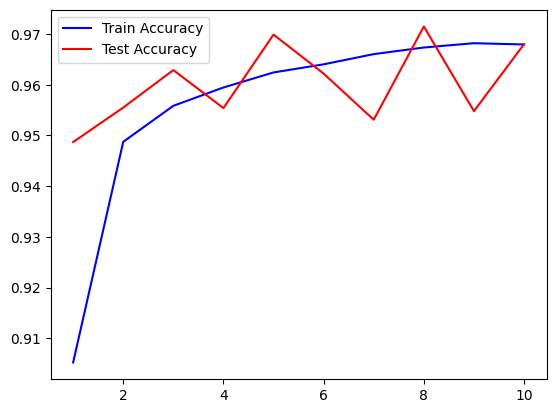

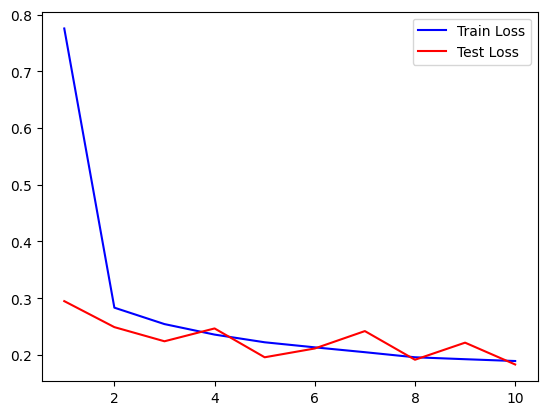

In [6]:
import matplotlib.pyplot as plt
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss= history.history['val_loss']

epochs =range(1,len(acc2)+1)
plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss2,'b',label='Train Loss')
plt.plot(epochs,val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [7]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=3)
history = model.fit(x_train,Y_train, epochs=30,batch_size=100,validation_data=(x_test,Y_test), callbacks=[early_stopping_monitor])

Epoch 1/30
600/600 [==============================] - 3s 6ms/step - loss: 0.1792 - accuracy: 0.9699 - val_loss: 0.2056 - val_accuracy: 0.9620
Epoch 2/30
600/600 [==============================] - 4s 6ms/step - loss: 0.1787 - accuracy: 0.9704 - val_loss: 0.1721 - val_accuracy: 0.9734
Epoch 3/30
600/600 [==============================] - 4s 7ms/step - loss: 0.1733 - accuracy: 0.9704 - val_loss: 0.1954 - val_accuracy: 0.9642
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.1710 - accuracy: 0.9710 - val_loss: 0.1924 - val_accuracy: 0.9655
Epoch 5/30
600/600 [==============================] - 4s 6ms/step - loss: 0.1688 - accuracy: 0.9713 - val_loss: 0.1693 - val_accuracy: 0.9711
Epoch 6/30
600/600 [==============================] - 5s 8ms/step - loss: 0.1687 - accuracy: 0.9703 - val_loss: 0.1747 - val_accuracy: 0.9695
Epoch 7/30
600/600 [==============================] - 3s 6ms/step - loss: 0.1603 - accuracy: 0.9730 - val_loss: 0.1953 - val_accuracy: 0.9646
Epoch 

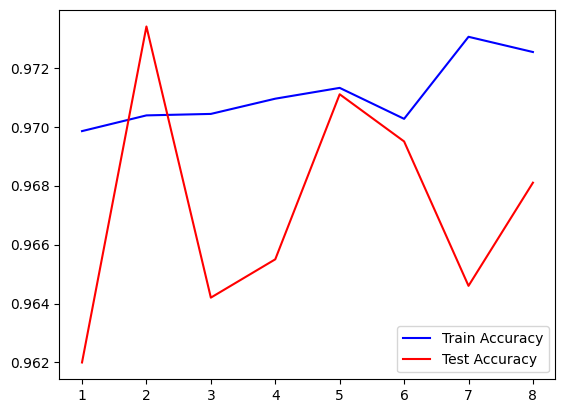

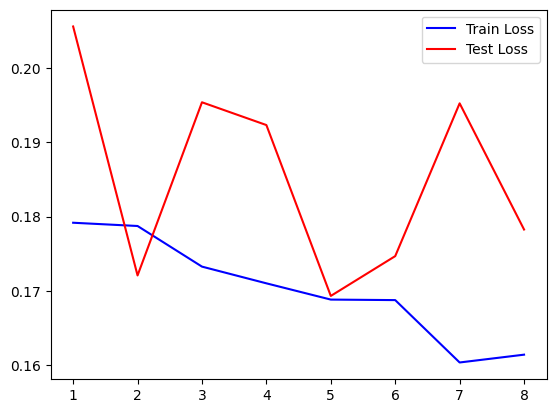

In [8]:
import matplotlib.pyplot as plt
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss= history.history['val_loss']

epochs =range(1,len(acc2)+1)
plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss2,'b',label='Train Loss')
plt.plot(epochs,val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [9]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [13]:
# Function to create model, required for KerasClassifier
def create_model():
  model5 = Sequential()
  model5.add(Dense(200,input_dim=784, activation ='relu'))
  model5.add(Dense(100, activation='relu'))
  model5.add(Dense(50, activation='relu'))
  model5.add(Dense(10, activation='softmax'))

  model5.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  return model5

Tune the batch size and epochs

In [14]:
#create model
model5=KerasClassifier(model=create_model, verbose =0)

#define the grid search parameters
batch_size=[100,128]
epochs = [10,15,20]
param_grid=dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model5, param_grid=param_grid,n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, Y_train)



In [15]:
#summarize results
print("Best:%f using %s" %(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with : %r" % (mean, stdev, param))

Best:0.974233 using {'batch_size': 128, 'epochs': 20}
0.972767 (0.000719) with : {'batch_size': 100, 'epochs': 10}
0.971783 (0.002557) with : {'batch_size': 100, 'epochs': 15}
0.971567 (0.003353) with : {'batch_size': 100, 'epochs': 20}
0.973017 (0.001919) with : {'batch_size': 128, 'epochs': 10}
0.971933 (0.002361) with : {'batch_size': 128, 'epochs': 15}
0.974233 (0.000946) with : {'batch_size': 128, 'epochs': 20}


Tune the Training Optimization Algorithm (only)

In [17]:
# create model
model6= KerasClassifier(model=create_model, loss ='categorical_crossentropy', epochs = 20, batch_size =128, verbose=0)

#define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adam', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator = model6, param_grid = param_grid, n_jobs = -1, cv =3)
grid_result = grid.fit(x_train, Y_train)


In [18]:
#summarize results
print("Best:%f using %s" %(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with : %r" % (mean, stdev, param))

Best:0.974133 using {'optimizer': 'Adagrad'}
0.971417 (0.003201) with : {'optimizer': 'SGD'}
0.972933 (0.002599) with : {'optimizer': 'RMSprop'}
0.972983 (0.001155) with : {'optimizer': 'Adam'}
0.974133 (0.000684) with : {'optimizer': 'Adagrad'}
0.973117 (0.001076) with : {'optimizer': 'Adadelta'}
0.971700 (0.000765) with : {'optimizer': 'Adamax'}
0.971867 (0.002188) with : {'optimizer': 'Nadam'}


Tune the Neuron Activation Function

In [22]:
# Function to create model, required for KerasClassifier
def create_model(activation ='relu'):
  model = Sequential()
  model.add(Dense(200,input_dim=784, activation = activation))
  model.add(Dense(100, activation=activation))
  model.add(Dense(50, activation=activation))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  return model

In [ ]:
# create model
model8= KerasClassifier(model=create_model, epochs = 10, batch_size =10, verbose=0)
activation = ['softmax','softplus','softsign','relu','tanh','sigmoid','hard_sigmoid','linear']
param_grid = dict(model__activation=activation)

grid = GridSearchCV(estimator = model8, param_grid = param_grid, n_jobs = -1, cv =3)
grid_result = grid.fit(x_train, Y_train)